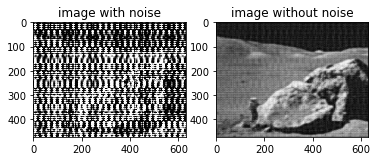

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim


#read image
img = cv2.imread('moonwalk.jpg',0)
fig_size = plt.rcParams["figure.figsize"]

#transform to forior
c = np.fft.fft2(img)
f = np.fft.fftshift(c)

#
M = f.shape[0]
N = f.shape[1]
butterwarth = numpy.ones((M,N))
center1 = M/2 
center2 = N/2
d0 = 30.0 
t2 = 2*1
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        r = math.sqrt(r1)
        if r > d0:
            butterwarth[i,j] = 1/(1 + (r/d0)**t2)

butterwarth = scipy.misc.toimage(butterwarth)
Multply = f * butterwarth 
newimg = abs(fftim.ifft2(Multply))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('image with noise')

plt.subplot(122),plt.imshow(newimg,cmap='gray'),plt.title('image without noise')

fig_size[0] = 40
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.show()
